# Performance extraction from antenna patterns


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
import glob
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

## Import Data

In [ ]:
cwd = Path.cwd()
cut_folder = Path('..\Prelimary Data Analysis\Field Cut Data\cut_files')
cut_file_list = cut_folder.glob('*00.cut')
log_file = Path('..\Prelimary Data Analysis\Field Cut Data\log_files\lookup.log')

file_to_open = cut_folder / '0.cut'
data = np.genfromtxt(file_to_open, skip_header=2,dtype = np.float32).T.reshape(4,1001,1)



for i in range(1,2499):
    file_to_open = cut_folder / (str(i)+'.cut')
    openFileData = np.genfromtxt(file_to_open, skip_header=2,dtype = np.float32).T.reshape(4,1001,1)
    data = np.append(data,openFileData,axis = 2)
    
    
parameters = np.genfromtxt(log_file, skip_header=2,dtype = np.float32).T
print(data.shape)


In [ ]:
V_INI, V_INC, V_NUM, C, ICOMP, ICUT, NCOMP = np.genfromtxt(file_to_open, max_rows=1, skip_header=1)
thetas = np.linspace(V_INI,V_INI+V_INC*(V_NUM-1),int(V_NUM))

In [ ]:

print(data[0,:,1])
print(parameters[1,parameters[1,:] > 0.05])

unique_diameter = np.unique(parameters[1,:],axis=0)
unique_focus_offset = np.unique(parameters[2,:],axis=0)

filtered_parameters=parameters[:,parameters[1,:] == unique_diameter[0]]


(4, 1001, 2499)
(4, 2499)


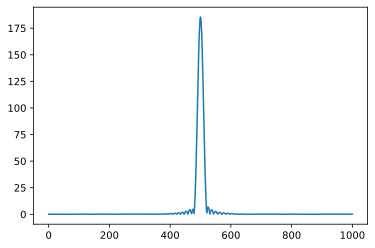

In [5]:
print(data.shape)
print(parameters.shape)
idx = 300

plt.plot(np.sqrt(data[0,:,idx]**2+data[0,:,idx]**2))

In [10]:

def indexSort(array,axis= 0):
    idxArray = np.argsort(array, axis = axis)
    sortedArray = np.sort(array, axis = axis)
    return idxArray,sortedArray

idx_parameters, sorted_parameters = indexSort(parameters,1)
print('Sorted Indicies',idx_parameters)
print('Sorted Parameters',sorted_parameters)

Sorted Indicies [[   0    1    2 ... 2496 2497 2498]
 [   0  754  755 ... 1746  739 2498]
 [1249 1299 1309 ...   78 1198 2498]
 [   0  158  159 ... 2339 2326 2498]]
Sorted Parameters [[1.000e+00 2.000e+00 3.000e+00 ... 2.497e+03 2.498e+03 2.499e+03]
 [1.000e-02 1.000e-02 1.000e-02 ... 2.000e-01 2.000e-01 2.000e-01]
 [4.000e-01 4.000e-01 4.000e-01 ... 1.200e+00 1.200e+00 1.200e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 3.000e+00 3.000e+00 3.000e+00]]


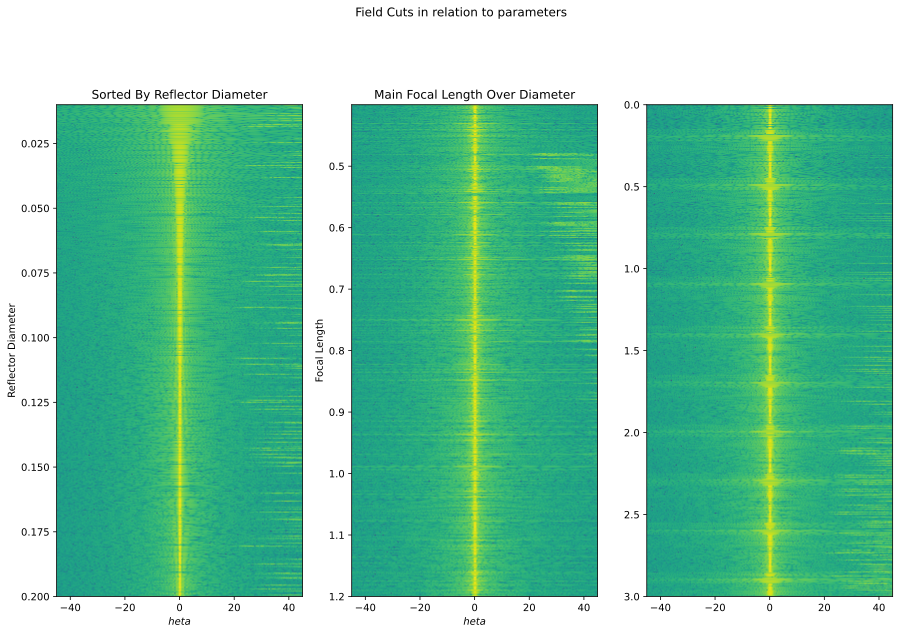

In [11]:




def imageCut(idx):
    return np.sqrt(data[0,:,idx_parameters[idx]]**2+data[0,:,idx_parameters[idx]]**2)

def plottingParams(param,idx):
    
    minVal = param[idx,-1]
    maxVal = param[idx,1]
    aspect = 2*90/(np.abs(maxVal-minVal))
    return minVal,maxVal,aspect




fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize = (15,10))
fig.suptitle('Field Cuts in relation to parameters', size = 12)
minVal,maxVal,aspect = plottingParams(sorted_parameters,1)
ax1.imshow(10*np.log10(imageCut(1)), interpolation='nearest',extent=[-45,45,minVal,maxVal], aspect=aspect)
ax1.set_title('Sorted By Reflector Diameter')
ax1.set_xlabel('$\theta$')
ax1.set_ylabel('Reflector Diameter')




minVal,maxVal,aspect = plottingParams(sorted_parameters,2)
ax2.imshow(10*np.log10(imageCut(2)), interpolation='nearest',extent=[-45,45,minVal,maxVal], aspect=aspect)
ax2.set_title('Main Focal Length Over Diameter')
ax2.set_xlabel('$\theta$')
ax2.set_ylabel('Focal Length')

minVal,maxVal,aspect = plottingParams(sorted_parameters,3)
ax3.imshow(10*np.log10(imageCut(3)), interpolation='nearest',extent=[-45,45,minVal,maxVal], aspect=aspect)

In [8]:
pIdx = 1

print(idx_parameters[pIdx])

data[0,:,idx_parameters[pIdx]]


[   0  754  755 ... 1746  739 2498]


array([[-0.03988618, -0.03586422, -0.03171447, ..., -0.03139845,
        -0.03559759, -0.03967199],
       [ 0.11923654,  0.12091576,  0.1221093 , ...,  0.1578722 ,
         0.15749146,  0.15705116],
       [-0.12902851, -0.12634061, -0.12322063, ..., -0.09263372,
        -0.09041799, -0.08818699],
       ...,
       [-0.00656999,  0.02826442,  0.01061928, ..., -0.02896129,
        -0.02912157, -0.03050696],
       [-0.02114311,  0.00805359,  0.02989102, ..., -0.02362569,
        -0.01678293, -0.00555056],
       [ 0.01240879,  0.01794916, -0.01079777, ..., -0.01558799,
        -0.01388031, -0.01457792]], dtype=float32)

In [9]:
def imageCutSelective(idx,p):
    
    selIdx = data[0,
    return np.sqrt(data[0,:,idx_parameters[idx]]**2+data[0,:,idx_parameters[idx]]**2)

fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize = (15,10))
fig.suptitle('Field Cuts in relation to parameters', size = 12)
minVal,maxVal,aspect = plottingParams(sorted_parameters,1)
ax1.imshow(10*np.log10(imageCut(1)), interpolation='nearest',extent=[-45,45,minVal,maxVal], aspect=aspect)
ax1.set_title('Sorted By Reflector Diameter')
ax1.set_xlabel('$\theta$')
ax1.set_ylabel('Reflector Diameter')


SyntaxError: invalid syntax (Temp/ipykernel_21328/3021315746.py, line 4)

In [ ]:
from scipy.fft import fft

fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize = (15,10))
fig.suptitle('Field Cuts in relation to parameters', size = 12)
ax1.imshow(np.roll(np.abs(fft(imageCut(1))),len(imageCut(1))//1), interpolation='nearest',extent=[-45,45,sorted_parameters[1,-1],sorted_parameters[1,0]], aspect=1000)

plt.figure()
plt.plot(np.roll(np.abs(fft(imageCut(1)[:,10])),len(imageCut(1))//2))



## Peak Gain

In [ ]:

Co_Gain = np.max(np.sqrt(data[0,:,:]**2+data[1,:,:]**2),axis=0)
X_Gain = np.max(np.sqrt(data[2,:,:]**2+data[3,:,:]**2),axis=0)
print(Co_Gain)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(10,10))
ax1.scatter(parameters[0,:],Co_Gain)
ax1.set_title('Index Versus Gain')
ax1.set_xlabel('Index')
ax2.scatter(parameters[1,:],Co_Gain)
ax2.set_title('Antenna Diameter Vs Gain')
ax2.set_xlabel('Atennna Diameter [m]')
ax3.scatter(parameters[2,:],Co_Gain)
ax3.set_title('Antenna Diameter Vs Gain')
ax4.scatter(parameters[3,:],Co_Gain)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(20,15))
ax1.scatter(parameters[0,:],X_Gain)
ax2.scatter(parameters[1,:],X_Gain)
ax3.scatter(parameters[2,:],X_Gain)
ax4.scatter(parameters[3,:],X_Gain)

## Sidelobe levels

In [ ]:
from scipy.signal import find_peaks
Co_Radiation_Pattern = np.sqrt(data[0,:,1]**2+data[1,:,1]**2)

print(Co_Radiation_Pattern[1])
peaks,__ = find_peaks(Co_Radiation_Pattern)
print(peaks)
plt.figure()
plt.plot(Co_Radiation_Pattern)
plt.scatter(peaks,Co_Radiation_Pattern[peaks])
print(-np.sort(-Co_Radiation_Pattern[peaks]))




## Half Power Beamwidth

In [ ]:
Co_BeamWidth = np.max(np.sqrt(data[0,:,:]**2+data[1,:,:]**2),axis=0)



# Find Nulls

In [ ]:
from scipy.signal import find_peaks


Neg_Co_Radiation_Pattern = -Co_Radiation_Pattern

print(Neg_Co_Radiation_Pattern[1])
peaks,__ = find_peaks(Neg_Co_Radiation_Pattern)
print(peaks)
plt.figure()
plt.plot(Neg_Co_Radiation_Pattern)
plt.scatter(peaks,Neg_Co_Radiation_Pattern[peaks])
print(-np.sort(-Neg_Co_Radiation_Pattern[peaks]))
print(thetas[peaks])

# Null Beamwidth